## Select the Right Threshold values for binary classifcation using ROC Curve

 Lets suppose we will take a scenario of a binary classification of A & B in such circumstances we can classify using the probability value of 0 to 1.
we will classify as follows, If the value is greater than 0.5 its B else A in common cases we can do that by using 0.5 as a Threshold,
but that value is not the correct threshold in every binary classification problem, it will change for each usecase, now we will try to predict the threshold using ROC curve.

In [44]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# roc curve and auc score
#using the below library we can create the dataset
from sklearn.datasets import make_classification

In [45]:
from sklearn.model_selection import train_test_split
#n_samples is no of samples we are considering
#n_classes is 2 since we use only two classes for binary classfication
#weights is [1,1] since we have to take a balanced dataset if you want you can change but balanced is only prefered for best results
X, y = make_classification(n_samples=2000, n_classes=2, weights=[1,1], random_state=1)

In [46]:
X.shape

(2000, 20)

In [47]:
y

array([0, 0, 0, ..., 1, 1, 0])

In [48]:
#split the dataset into traindata and testdata
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [49]:

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

## Now we will apply the dataset on different algorithms

### Random Forests

In [50]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
ytrain_pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc: 1.0
RF test roc-auc: 0.9815777777777778


In [51]:
#prediction percentages
#first coloumn gives the probaility of the values to be 1 and second column gives prob of value to be 0
#we can consider only one from the two columns and later on we can apply the condition to classify after finding the threshold value
ytrain_pred

array([[1.  , 0.  ],
       [0.97, 0.03],
       [0.03, 0.97],
       ...,
       [0.96, 0.04],
       [1.  , 0.  ],
       [0.36, 0.64]])

## Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(X_train, y_train)
ytrain_pred = log_classifier.predict_proba(X_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Logistic train roc-auc: 0.9863568922694498
Logistic test roc-auc: 0.9885777777777777


## Adaboost Classifier

In [53]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.9975081174960356
Adaboost test roc-auc: 0.9826111111111111


## KNNClassifier

In [54]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
ytrain_pred = knn_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.981670071491109
Adaboost test roc-auc: 0.9426111111111111


### Now we will focus on selecting the best threshold for maximum accuracy

Now we will calculate the predictions for each sample using all the models and we will append all the results in a list called pred. 
Then we will calculate the mean of all the  individual sample results from different models.


In [61]:
pred=[]
for model in [rf_model,log_classifier,ada_classifier,knn_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.9846777777777779


In [67]:
col=pd.concat(pred,axis=1)

In [70]:
col.columns=['rf_model','log_classifier','ada_classifier','knn_classifier']
col

,rf_model,log_classifier,ada_classifier,knn_classifier
0,0.99,0.991861,0.559186,1.0
1,0.01,0.000008,0.463282,0.0
2,0.96,0.966929,0.538202,0.8
3,0.94,0.761539,0.509875,0.8
4,0.57,0.779443,0.490344,0.4
...,...,...,...,...
595,0.00,0.024239,0.461121,0.0
596,0.02,0.000003,0.441377,0.0
597,1.00,0.984385,0.532403,1.0
598,0.01,0.001147,0.441720,0.2


In [15]:
final_prediction

0      0.877762
1      0.118323
2      0.821283
3      0.755353
4      0.564947
         ...   
595    0.123840
596    0.115345
597    0.876697
598    0.160717
599    0.837357
Length: 600, dtype: float64

In [16]:
#### Calculate the ROc Curve
#now by using the above thresholds we are going to test on y_test
#output will be 3 values false +ve rate, true +ve rate, thresholds

fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.91188114, 0.91188114, 0.90158893, 0.90077475, 0.80306516,
       0.8030558 , 0.79631489, 0.79412833, 0.78317698, 0.78071156,
       0.75545305, 0.75537124, 0.71369595, 0.70893711, 0.70013034,
       0.69887362, 0.6717442 , 0.66993537, 0.59712652, 0.59300386,
       0.5871569 , 0.58175354, 0.56845371, 0.56736186, 0.54542732,
       0.52889283, 0.51115858, 0.48366892, 0.45990225, 0.43222765,
       0.4296034 , 0.38405357, 0.37879719, 0.34933098, 0.34336612,
       0.24599466, 0.24140421, 0.21102808, 0.20848417, 0.12801207,
       0.1278351 , 0.10632697])

In [71]:
y_test

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,

In [17]:
#now we have got the threshold values but we dont know which threshold value to consider 
#for that we will consider each threshold value and will compare the final_prediction value with threshold value
#if the final_prediction value is greater the threshold value then consider the output as 1 and store in y_pred
#then compare the y_test and y_pred and calculate the accuracy score and append the output to accuracy_ls
#now we will create a dataframe for two cols thresholds and accuarcy_ls as print the accuracy for each threshold value
#we will select the threshold value with the highest accuracy
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)

In [18]:
accuracy_ls

,thresholds,accuracy
29,0.432228,0.960000
28,0.459902,0.960000
25,0.528893,0.960000
24,0.545427,0.960000
30,0.429603,0.958333
27,0.483669,0.958333
26,0.511159,0.958333
23,0.567362,0.953333
22,0.568454,0.951667
21,0.581754,0.946667


In [19]:

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

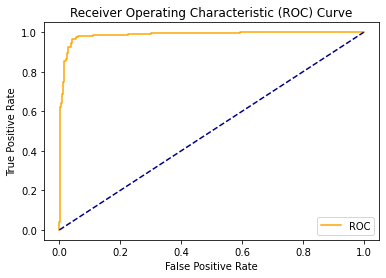

In [20]:
#AS you can see the plotted curve is covering most of the region
plot_roc_curve(fpr,tpr)